In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.notebook import tqdm
from functools import partial
import gudhi as gd
import scipy.spatial as spatial
from more_itertools import powerset
from string import ascii_letters

In [2]:
points = np.asarray([
    [0,0],
    [0.5, 0],
    [0.25 + 0.8, 0.5 * np.sqrt(3)/2 ],
    #[ 0.75/3, (0.5 * np.sqrt(3)/2)/3 ],
])


<IPython.core.display.Javascript object>


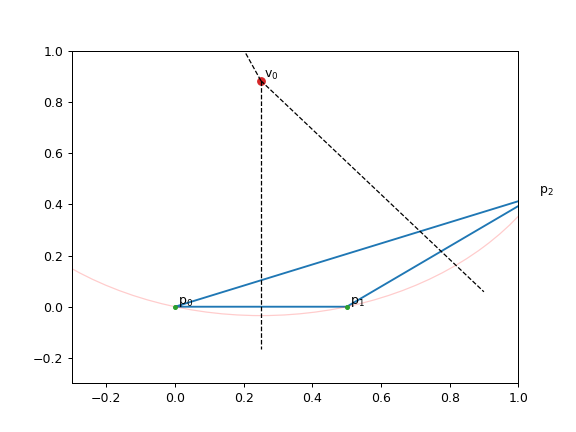

In [3]:
%matplotlib notebook
def compute_centroid(points):
    return np.sum(points, axis = 0) / points.shape[0]

tri = spatial.Delaunay(points)

fig = plt.figure()
ax = fig.add_subplot()
ax.triplot(points[:,0], points[:,1], tri.simplices)

for i,p in enumerate(points):
    ax.text(
        *tuple(p+0.01),
        str("$\mathregular{p_{"+str(i)+"}}$"),
        #fontsize = 20
    )

vor = spatial.Voronoi(points)

kt = spatial.KDTree(points)

for i,p in enumerate(vor.vertices):
    dists, _ = kt.query(p, k = 3)
    assert np.allclose(dists, dists[0])
    circ = plt.Circle(tuple(p), radius=dists[0], fill = False, color ="red", alpha = .2)
    ax.add_patch(circ)
    ax.text(
        *tuple(p+0.01),
        str("$\mathregular{v_{"+str(i)+"}}$"),
        #fontsize = 20
    )
    
spatial.voronoi_plot_2d(vor, ax = ax)
plt.xlim(-0.3,1)
plt.ylim(-0.3,1)
plt.show()